# **Import Libraries**

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model




# **Load and preprocess the dataset using ImageDataGenerator**

In [ ]:
# Define data directories
train_dir = '/content/drive/MyDrive/archive (7)/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/archive (7)/Covid19-dataset/test'

# Initialize an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.20
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators for training and testing data
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
print(f"Number of images in the test dataset: {test_generator.samples}")
print(f"Number of images in the training dataset: {train_generator.samples}")
print(f"Number of images in the validation dataset: {validation_generator.samples}")


Number of images in the test dataset: 66
Number of images in the training dataset: 201
Number of images in the validation dataset: 50


In [ ]:
# Find the number of classes in the test dataset
print(f"Number of classes in the test dataset: {test_generator.num_classes}")
print(f"Number of classes in the training dataset: {train_generator.num_classes}")
print(f"Number of classes in the validaton dataset: {validation_generator.num_classes}")


Number of classes in the test dataset: 3
Number of classes in the training dataset: 3
Number of classes in the validaton dataset: 3


In [ ]:
print("class name of training data :",os.listdir(train_dir))
print("class name of testing data :",os.listdir(test_dir))

class name of training data : ['Covid', 'Viral Pneumonia', 'Normal']
class name of testing data : ['Normal', 'Covid', 'Viral Pneumonia']


In [ ]:
train_generator.class_indices


{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
test_generator.class_indices


{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

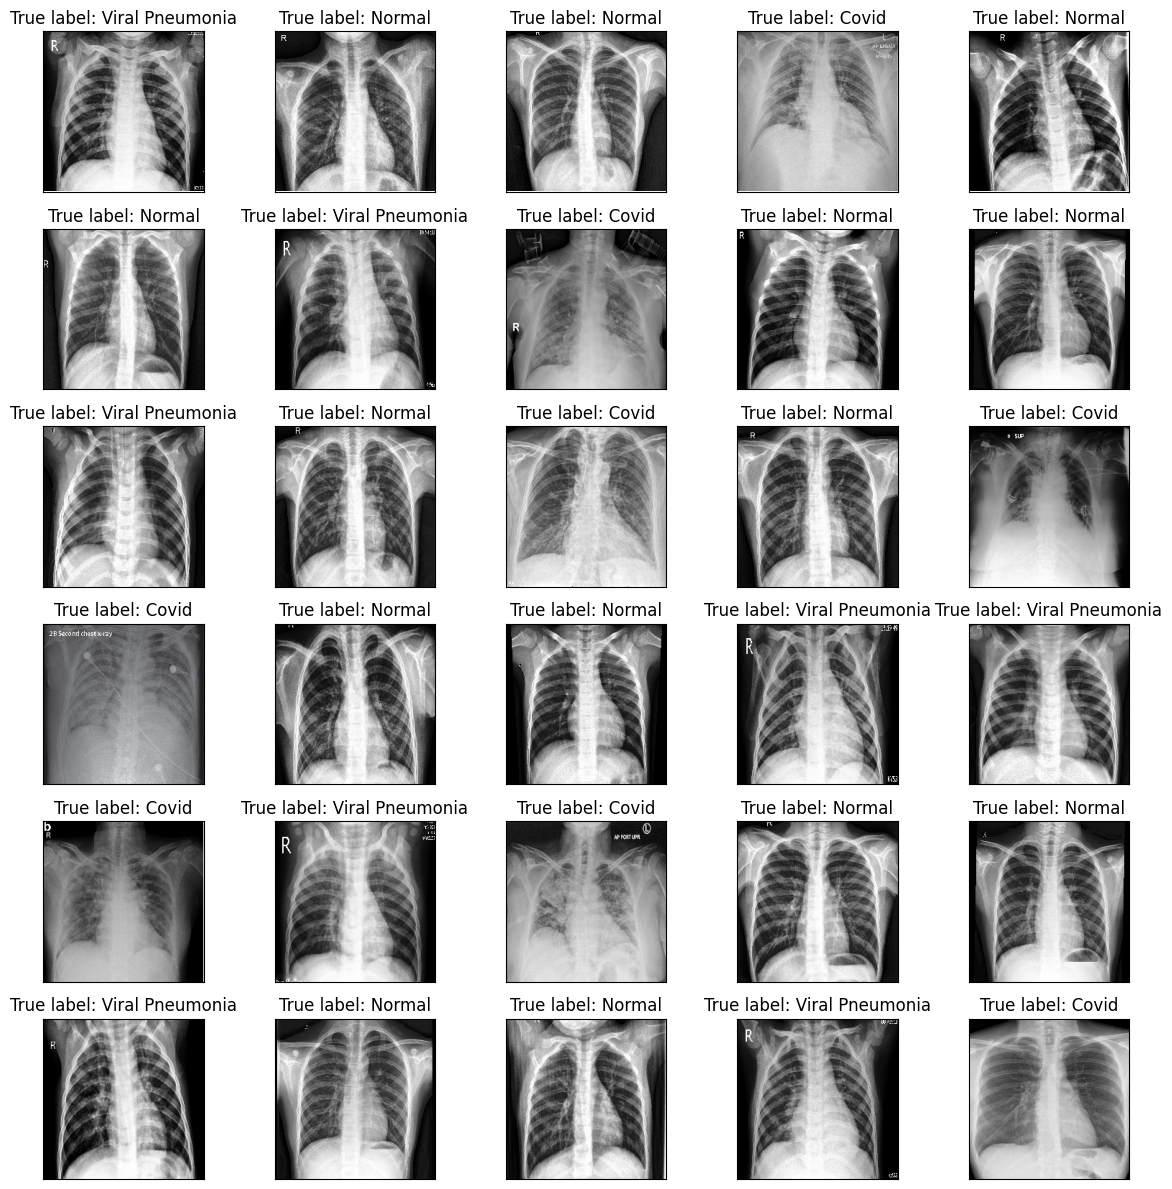

In [ ]:
import matplotlib.pyplot as plt

batch_images, batch_one_hot_labels = next(train_generator)

# Convert one-hot encoded labels to class labels
class_labels = ['Covid', 'Normal', 'Viral Pneumonia']
batch_labels = [class_labels[np.argmax(label)] for label in batch_one_hot_labels]

num_images_to_display = min(len(batch_images), 30)

# Display the images and labels in a 6x5 grid
plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch_images[i])
    plt.title(f"True label: {batch_labels[i]}")

plt.tight_layout()
plt.show()



## Build Model

In [ ]:
# Create a Sequential model named "model1"
model1 = Sequential()

# Convolutional layers with increasing parameters
model1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3))),
model1.add(MaxPooling2D((2, 2))),
model1.add(Conv2D(128, (3, 3), activation='relu')),
model1.add(MaxPooling2D((2, 2))),
model1.add(Conv2D(256, (3, 3), activation='relu')),
model1.add(MaxPooling2D((2, 2))),

# Global Average Pooling layer
model1.add(GlobalAveragePooling2D()),

# Fully connected layers for classification
model1.add(Dense(256, activation='relu')),
model1.add(Dense(3, activation='softmax')),

# Compile "model1"
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train "model1"
history1 = model1.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    epochs=10,
)

# Evaluate "model1" on the test data
test_loss1, test_acc1 = model1.evaluate(test_generator)
print(f'Test accuracy for model1: {test_acc1 * 100:.2f}%')

Epoch 1/10
7/7 [==============================] - 82s 10s/step - loss: 1.0988 - accuracy: 0.4179 - val_loss: 1.0782 - val_accuracy: 0.4400
Epoch 2/10
7/7 [==============================] - 78s 11s/step - loss: 1.0797 - accuracy: 0.4428 - val_loss: 1.0881 - val_accuracy: 0.4400
Epoch 3/10
7/7 [==============================] - 74s 11s/step - loss: 1.0780 - accuracy: 0.4577 - val_loss: 1.0736 - val_accuracy: 0.4400
Epoch 4/10
7/7 [==============================] - 72s 10s/step - loss: 1.0557 - accuracy: 0.4428 - val_loss: 1.0656 - val_accuracy: 0.4400
Epoch 5/10
7/7 [==============================] - 80s 11s/step - loss: 0.9904 - accuracy: 0.5274 - val_loss: 1.0792 - val_accuracy: 0.4200
Epoch 6/10
7/7 [==============================] - 80s 12s/step - loss: 0.9532 - accuracy: 0.5572 - val_loss: 1.2223 - val_accuracy: 0.3400
Epoch 7/10
7/7 [==============================] - 75s 12s/step - loss: 0.8458 - accuracy: 0.6617 - val_loss: 1.0001 - val_accuracy: 0.4600
Epoch 8/10
7/7 [===========

## **After training the basic model with a batch size of 32 for 10 epochs, the model achieved the following results:**

**Training Accuracy**: 56.23%

**Testing Accuracy**: 62.12%

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

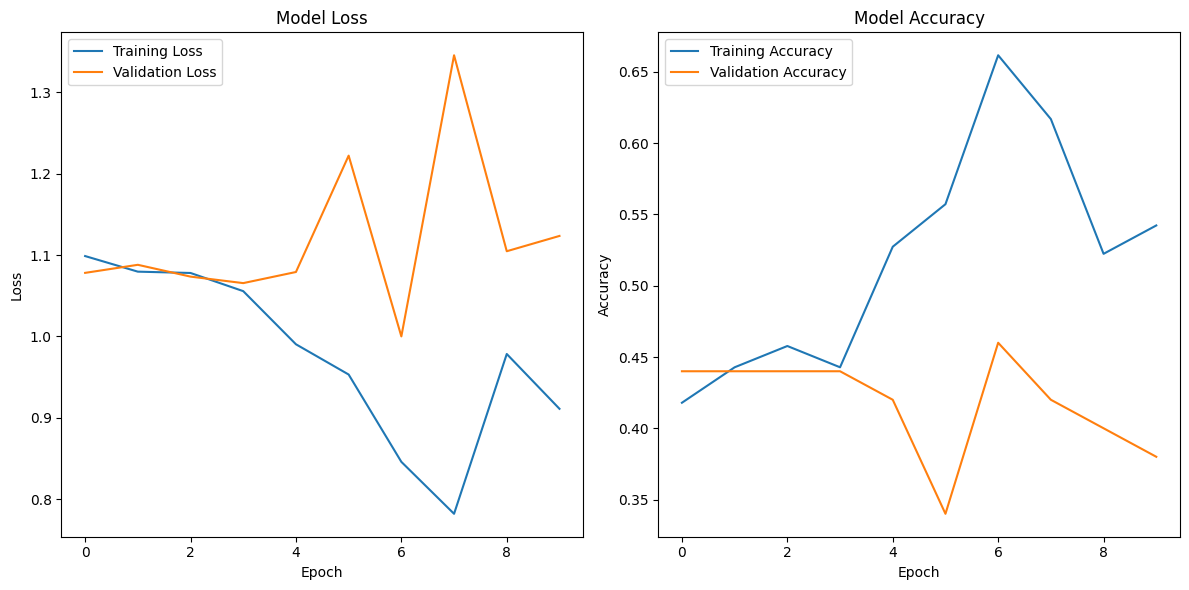

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 3s 3s/step


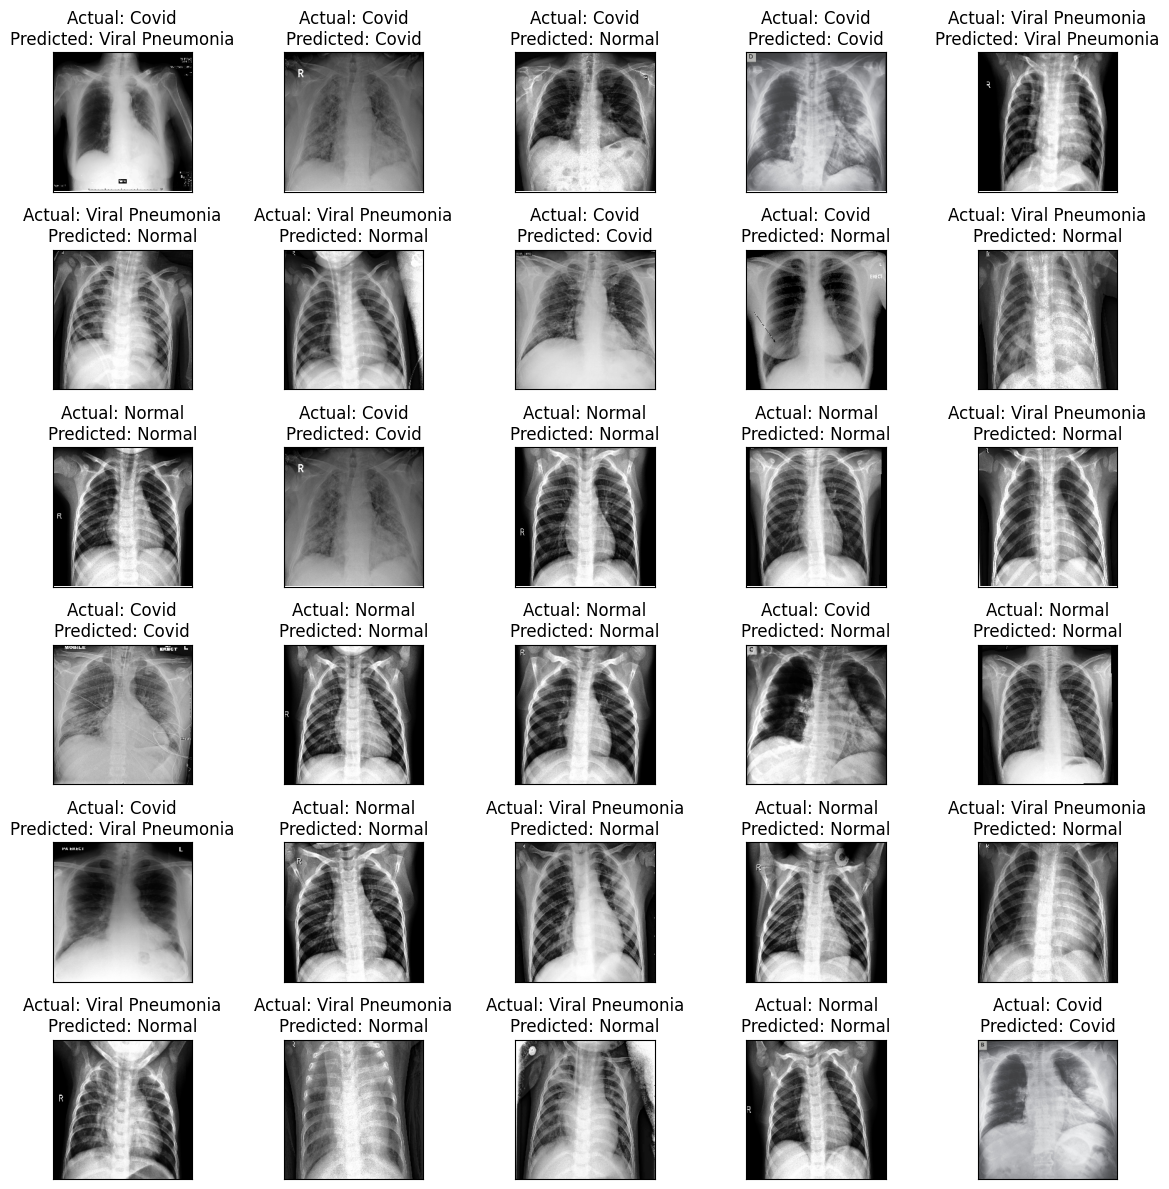

In [ ]:
batch_images, batch_one_hot_labels = next(test_generator)
class_labels = ['Covid', 'Normal', 'Viral Pneumonia']
batch_actual_labels = [class_labels[np.argmax(label)] for label in batch_one_hot_labels]

batch_predictions = model1.predict(batch_images)
batch_predicted_labels = [class_labels[np.argmax(label)] for label in batch_predictions]

num_images_to_display = min(len(batch_images), 30)  # up to 30 images

# Display the images along with actual and predicted labels in a 6x5 grid
plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch_images[i])
    plt_title = f"Actual: {batch_actual_labels[i]}\nPredicted: {batch_predicted_labels[i]}"
    plt.title(plt_title)

plt.tight_layout()
plt.show()


## **Using a Pre-trained Model (ResNet50)**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with different batch sizes
batch_sizes = [16, 32, 64]  # Experiment with different batch sizes
for batch_size in batch_sizes:
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        batch_size=batch_size,
        callbacks=[early_stop]
    )

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')



Epoch 1/10
7/7 [==============================] - 74s 10s/step - loss: 1.2692 - accuracy: 0.3085 - val_loss: 1.2559 - val_accuracy: 0.4400
Epoch 2/10
7/7 [==============================] - 67s 10s/step - loss: 1.0713 - accuracy: 0.5423 - val_loss: 1.1074 - val_accuracy: 0.3000
Epoch 3/10
7/7 [==============================] - 57s 8s/step - loss: 1.0472 - accuracy: 0.3284 - val_loss: 1.0098 - val_accuracy: 0.5600
Epoch 4/10
7/7 [==============================] - 66s 10s/step - loss: 0.9727 - accuracy: 0.5224 - val_loss: 0.9371 - val_accuracy: 0.6800
Epoch 5/10
7/7 [==============================] - 67s 10s/step - loss: 0.8893 - accuracy: 0.6368 - val_loss: 0.8923 - val_accuracy: 0.6800
Epoch 6/10
7/7 [==============================] - 66s 11s/step - loss: 0.8227 - accuracy: 0.6617 - val_loss: 0.8601 - val_accuracy: 0.6400
Epoch 7/10
7/7 [==============================] - 67s 10s/step - loss: 0.8403 - accuracy: 0.6866 - val_loss: 0.8465 - val_accuracy: 0.6000
Epoch 8/10
7/7 [============

### **After training ResNet-50 for 10 epochs with a batch size of 64, the model achieved the following results:**

**Training Accuracy**: 82.59%


**Testing Accuracy**: 84.85%

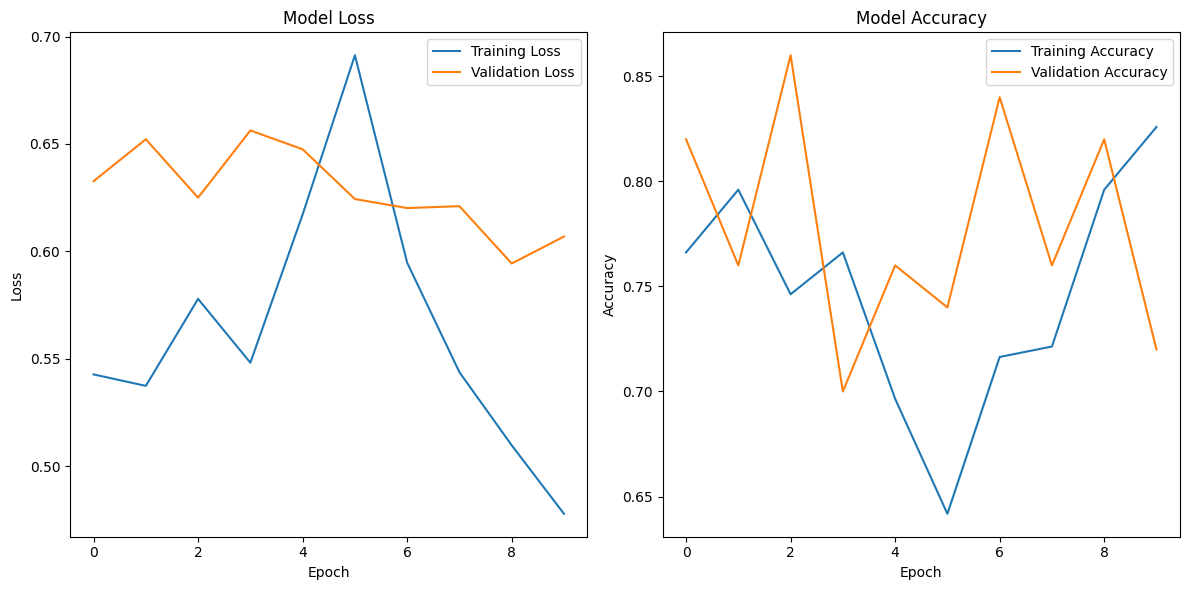

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 8s 8s/step


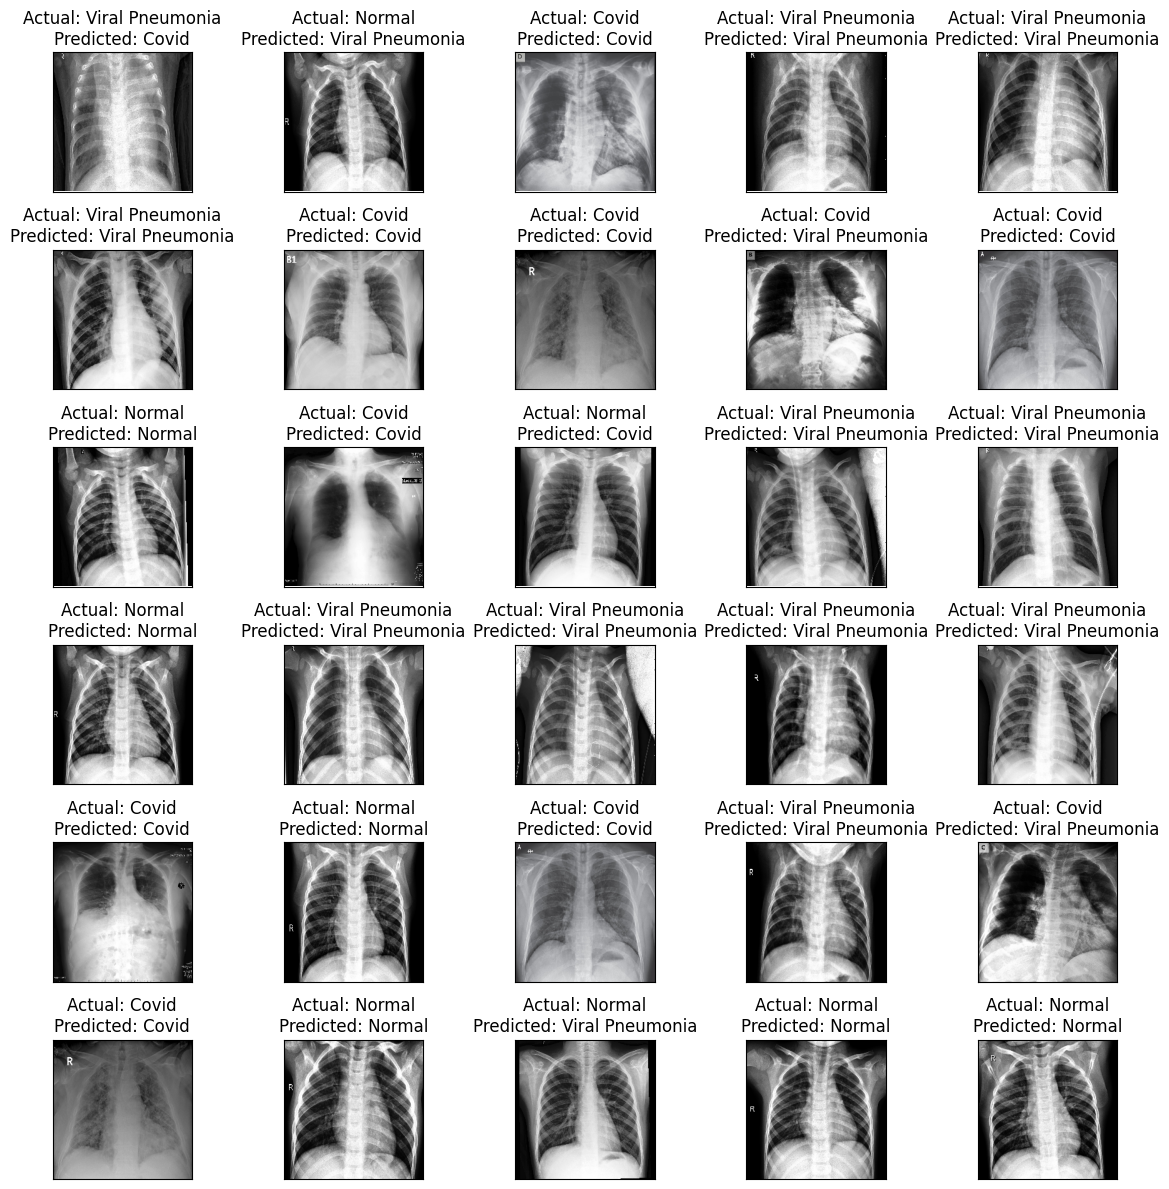

In [ ]:
# Get a batch of test images and their actual labels
batch_images, batch_one_hot_labels = next(test_generator)
class_labels = ['Covid', 'Normal', 'Viral Pneumonia']
batch_actual_labels = [class_labels[np.argmax(label)] for label in batch_one_hot_labels]

# Make predictions on the test batch using your model
batch_predictions = model.predict(batch_images)
batch_predicted_labels = [class_labels[np.argmax(label)] for label in batch_predictions]

# Determine the number of images to display (up to 30)
num_images_to_display = min(len(batch_images), 30)

# Display the images along with actual and predicted labels in a 6x5 grid
plt.figure(figsize=(12, 12))
for i in range(num_images_to_display):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(batch_images[i])
    plt_title = f"Actual: {batch_actual_labels[i]}\nPredicted: {batch_predicted_labels[i]}"
    plt.title(plt_title)

plt.tight_layout()
plt.show()